<a href="https://colab.research.google.com/github/meganlcole327/MLA_MLC/blob/main/MLA4_MLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment 4

Megan Cole

CS430-ON

Decision Trees

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Specific Model Imports

In [3]:
from sklearn import tree
from sklearn.tree import export_text

#Imports for Splitting Data and Building Pipeline

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn import set_config
set_config(display='diagram')

#Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

#Confusion Matrix Function

In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#Problem 1

#1. Aquire Data

In [8]:
file_path = '/content/gdrive/MyDrive/BU/CS430/banknote_authentication.csv'
df = pd.read_csv(file_path)

df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#2. Splitting Data into Train/Test

In [9]:
X = df.drop(columns=['forgery'], axis=1)
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#3. Build the Pipeline

In [10]:
numerical_features = X.select_dtypes(include=['number']).columns
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

#4. Execute the Model

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

#5. Evaluating the Model

Precision: 1.0000
Recall: 0.9449
F1 Score: 0.9717


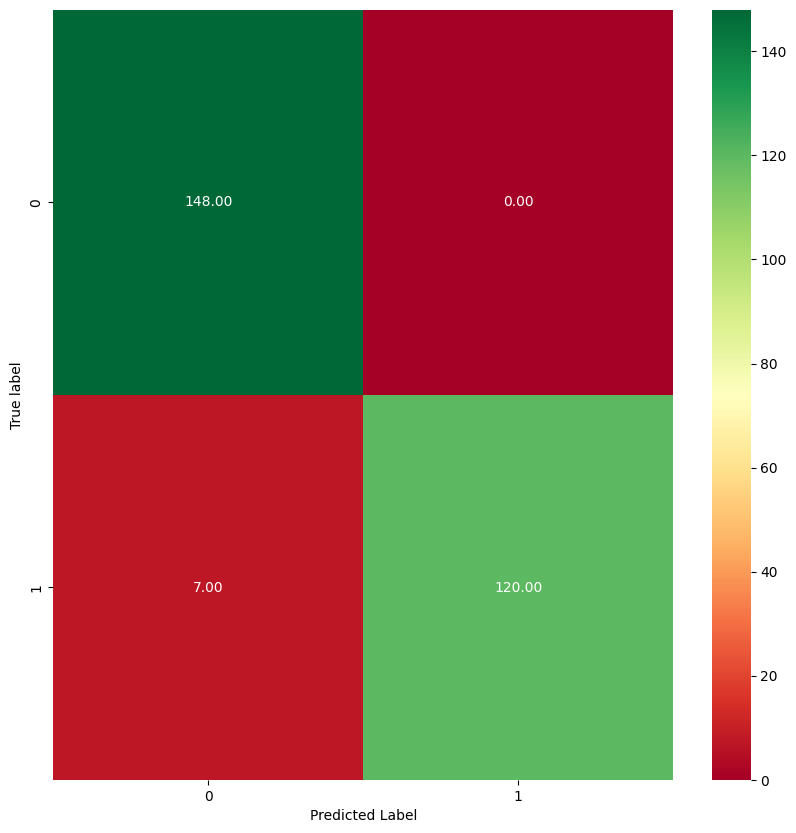

In [13]:
y_pred = pipeline.predict(X_test)

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

This model has really good performance. The precision of 1.0 shows us that every instance of the model predicted foregy correctly. The recall suggests that the model successfully identifies around 94% of all the forgeries. The F1 score shows that there is a strong balance between precision and recall. Therefore, this descision tree is highly effect of the dataset and a good use.

#6. Conclusion

The decision tree classifier effectively detected forged banknote with a high rate of accuraccy. The evaluation of this model suggests that the pipeline preprocessing and modeling is well-suited for this problem.

#Problem 2

#1. Aquire Data

In [14]:
df = pd.read_csv('/content/gdrive/MyDrive/BU/CS430/Steel_industry_data.csv')

In [15]:
#Rename Columns
df.rename(columns={
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor' : 'lag_current_pwr',
    'Leading_Current_Power_Factor' : 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}, inplace=True)

print(df.head())

               date  usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  \
0  01/01/2018 00:15       3.17                 2.95                   0.0   
1  01/01/2018 00:30       4.00                 4.46                   0.0   
2  01/01/2018 00:45       3.24                 3.28                   0.0   
3  01/01/2018 01:00       3.31                 3.56                   0.0   
4  01/01/2018 01:15       3.82                 4.50                   0.0   

   CO2(tCO2)  lag_current_pwr  lead_current_pwr   nsm week_status day_of_week  \
0        0.0            73.21             100.0   900     Weekday      Monday   
1        0.0            66.77             100.0  1800     Weekday      Monday   
2        0.0            70.28             100.0  2700     Weekday      Monday   
3        0.0            68.09             100.0  3600     Weekday      Monday   
4        0.0            64.72             100.0  4500     Weekday      Monday   

    load_type  
0  Light_Load  
1  Light_Load  
2 

#2. Split Data into Test/Train

In [16]:
X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Build the Pipeline

In [17]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('transformer', transformer),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

#4. Execute the Model

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

#5. Evaluate the Model

In [19]:
y_pred = pipeline.predict(X_test)

train_pred = pipeline.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 1.851955252463718e-16
RMSE Test: 1.4140982088568803


The large gao between training and testing performance indicates that there could be overfitting. RSME train is very close to zero, which is really good for memorizing the training data. But, it does not generalize as well to the test set. The RSME test indicates reasonable predicitbe accuracy. It suggests that the model may be limited when dealing with unseen data.

#6. Conclusion

The decision tree nodel showed really good performance on the training data but overfit the dataset. That can be seen from the increased RSME on the test set. I think that this may not be the best model to use because of the overfitting.

